# **Libraries**

In [1]:
import pandas as pd
import numpy as np

#import libraries for data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots


from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

import warnings
warnings.filterwarnings('ignore')

import time

# **Load Dataset**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/PA (LJ)/DATA/Dataset/Crop_recommendation_ind_vers.csv')
dataset.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,padi
1,85,58,41,21.770462,80.319644,7.038096,226.655537,padi
2,60,55,44,23.004459,82.320763,7.840207,263.964248,padi
3,74,35,40,26.491096,80.158363,6.980401,242.864034,padi
4,78,42,42,20.130175,81.604873,7.628473,262.717340,padi


In [4]:
dataset.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,kopi
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,kopi
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,kopi
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,kopi
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,kopi


# **Dataset Understanding**

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [6]:
dataset.shape

(2200, 8)

In [7]:
dataset.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [8]:
dataset.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,padi
1,85,58,41,21.770462,80.319644,7.038096,226.655537,padi
2,60,55,44,23.004459,82.320763,7.840207,263.964248,padi
3,74,35,40,26.491096,80.158363,6.980401,242.864034,padi
4,78,42,42,20.130175,81.604873,7.628473,262.717340,padi


# **Data Preparation**

In [9]:
dataset.isna().sum()

,0
N,0
P,0
K,0
temperature,0
humidity,0
ph,0
rainfall,0
label,0


In [10]:
dataset.duplicated().sum()

0

In [11]:
dataset.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [12]:
dataset['label'].unique()

array(['padi', 'jagung', 'kacang arab', 'kacang merah', 'kacang kapri',
       'kacang gude', 'kacang hijau', 'kacang hitam', 'lentil', 'delima',
       'pisang', 'mangga', 'anggur', 'semangka', 'melon', 'apel', 'jeruk',
       'pepaya', 'kelapa', 'kapas', 'rami', 'kopi'], dtype=object)

In [13]:
categorical_columns = dataset.select_dtypes(include=['object']).columns
numerical_columns = dataset.select_dtypes(include=['int', 'float']).columns

In [14]:
for col in numerical_columns:
    print(f'Values {col} :')
    print(dataset[col].value_counts(), '\n')

Values N :
N
22     44
40     44
27     42
39     41
31     41
       ..
136     2
139     1
135     1
130     1
46      1
Name: count, Length: 137, dtype: int64 

Values P :
P
60    56
58    48
56    46
55    44
57    42
      ..
83     2
82     2
90     2
93     1
84     1
Name: count, Length: 117, dtype: int64 

Values K :
K
17    90
22    87
15    86
20    80
25    78
      ..
5      8
11     8
13     7
7      5
80     4
Name: count, Length: 73, dtype: int64 

Values temperature :
temperature
20.879744    1
29.480699    1
29.943492    1
28.033065    1
29.884305    1
            ..
25.365861    1
28.568406    1
30.284966    1
27.325421    1
23.603016    1
Name: count, Length: 2200, dtype: int64 

Values humidity :
humidity
82.002744    1
90.336987    1
93.907412    1
91.473558    1
94.037115    1
            ..
66.637972    1
61.532786    1
61.692951    1
69.090478    1
60.396475    1
Name: count, Length: 2200, dtype: int64 

Values ph :
ph
6.502985    1
6.640471    1
6.251420    1


In [15]:
dataset[numerical_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
N,2200.0,50.551818,36.917334,0.000000,21.000000,37.000000,84.250000,140.000000
P,2200.0,53.362727,32.985883,5.000000,28.000000,51.000000,68.000000,145.000000
K,2200.0,48.149091,50.647931,5.000000,20.000000,32.000000,49.000000,205.000000
temperature,2200.0,25.616244,5.063749,8.825675,22.769375,25.598693,28.561654,43.675493
humidity,2200.0,71.481779,22.263812,14.258040,60.261953,80.473146,89.948771,99.981876
ph,2200.0,6.469480,0.773938,3.504752,5.971693,6.425045,6.923643,9.935091
rainfall,2200.0,103.463655,54.958389,20.211267,64.551686,94.867624,124.267508,298.560117


## **Data Categorical**

In [16]:
for col in categorical_columns:
    unique_values = dataset[col].value_counts()
    print(f"Values {col} :\n{unique_values}\n")

Values label :
label
padi            100
jagung          100
rami            100
kapas           100
kelapa          100
pepaya          100
jeruk           100
apel            100
melon           100
semangka        100
anggur          100
mangga          100
pisang          100
delima          100
lentil          100
kacang hitam    100
kacang hijau    100
kacang gude     100
kacang kapri    100
kacang merah    100
kacang arab     100
kopi            100
Name: count, dtype: int64



In [17]:
dataset[categorical_columns].describe().T

,count,unique,top,freq
label,2200,22,padi,100


In [18]:
dataset['label'].unique()

array(['padi', 'jagung', 'kacang arab', 'kacang merah', 'kacang kapri',
       'kacang gude', 'kacang hijau', 'kacang hitam', 'lentil', 'delima',
       'pisang', 'mangga', 'anggur', 'semangka', 'melon', 'apel', 'jeruk',
       'pepaya', 'kelapa', 'kapas', 'rami', 'kopi'], dtype=object)

# **Data Pre-Processing**

## **Label Encoding**

In [19]:
from sklearn.preprocessing import LabelEncoder

df = pd.DataFrame(dataset)

encoder = LabelEncoder()

df['label_en'] = encoder.fit_transform(df['label'])

labels_lis = sorted(df['label'].unique())
labels_dic = {}
df.drop('label',axis='columns',inplace=True)
for i,val in enumerate(labels_lis):
    labels_dic.update({i:val})
labels_dic

{0: 'anggur',
 1: 'apel',
 2: 'delima',
 3: 'jagung',
 4: 'jeruk',
 5: 'kacang arab',
 6: 'kacang gude',
 7: 'kacang hijau',
 8: 'kacang hitam',
 9: 'kacang kapri',
 10: 'kacang merah',
 11: 'kapas',
 12: 'kelapa',
 13: 'kopi',
 14: 'lentil',
 15: 'mangga',
 16: 'melon',
 17: 'padi',
 18: 'pepaya',
 19: 'pisang',
 20: 'rami',
 21: 'semangka'}

## **Data Scaling**

In [20]:
# Pisahkan fitur dan label
features = df[['N', 'P', 'K', 'temperature', 'humidity', 'ph']]
label = df['label_en']

# Scaling the data so that all the features become comparable
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

x = pd.DataFrame(X_scaled, columns=features.columns)

x.head()

,N,P,K,temperature,humidity,ph
0,1.068797,-0.344551,-0.101688,-0.935587,0.472666,0.043302
1,0.933329,0.140616,-0.141185,-0.759646,0.397051,0.734873
2,0.255986,0.049647,-0.081939,-0.515898,0.486954,1.771510
3,0.635298,-0.556811,-0.160933,0.172807,0.389805,0.660308
4,0.743673,-0.344551,-0.121436,-1.083647,0.454792,1.497868


In [21]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   float64
 1   P            2200 non-null   float64
 2   K            2200 non-null   float64
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
dtypes: float64(6)
memory usage: 103.3 KB


## **Linkage**

In [22]:
#clustering with sklearn

# from sklearn.metrics.pairwise import euclidean_distances

# distMatrix = euclidean_distances(x, x)
# print(distMatrix)

from sklearn.metrics.pairwise import cosine_distances

distMatrix = cosine_distances(x, x)
print(distMatrix)

[[0.         0.16830705 0.64487297 ... 0.22635213 0.50033206 0.31076503]
 [0.16830705 0.         0.2475054  ... 0.41940912 0.54218213 0.4377202 ]
 [0.64487297 0.2475054  0.         ... 0.92729952 0.84999107 0.7335118 ]
 ...
 [0.22635213 0.41940912 0.92729952 ... 0.         0.1025433  0.09408684]
 [0.50033206 0.54218213 0.84999107 ... 0.1025433  0.         0.08149575]
 [0.31076503 0.4377202  0.7335118  ... 0.09408684 0.08149575 0.        ]]


In [23]:
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist

dist_matrix = pdist(features)

Z = hierarchy.linkage(dist_matrix, method='average')

c, coph_dists = hierarchy.cophenet(Z, dist_matrix)
print("Koefisien Korelasi Cophenetic:", c)

Koefisien Korelasi Cophenetic: 0.9450398452475841


In [24]:
Z1 = hierarchy.linkage(dist_matrix, method='complete')

c, coph_dists = hierarchy.cophenet(Z1, dist_matrix)
print("Koefisien Korelasi Cophenetic:", c)

Koefisien Korelasi Cophenetic: 0.8952447644237189


In [25]:
Z2 = hierarchy.linkage(dist_matrix, method='single')

c, coph_dists = hierarchy.cophenet(Z2, dist_matrix)
print("Koefisien Korelasi Cophenetic:", c)

Koefisien Korelasi Cophenetic: 0.8881844807130348


In [26]:
Z3 = hierarchy.linkage(dist_matrix, method='ward')

c, coph_dists = hierarchy.cophenet(Z3, dist_matrix)
print("Koefisien Korelasi Cophenetic:", c)

Koefisien Korelasi Cophenetic: 0.8803372966200715


## **Dendogram**

In [27]:
df['label_dec'] = df['label_en'].map(labels_dic)

# Tampilkan DataFrame untuk melihat hasil
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label_en,label_dec
0,90,42,43,20.879744,82.002744,6.502985,202.935536,17,padi
1,85,58,41,21.770462,80.319644,7.038096,226.655537,17,padi
2,60,55,44,23.004459,82.320763,7.840207,263.964248,17,padi
3,74,35,40,26.491096,80.158363,6.980401,242.864034,17,padi
4,78,42,42,20.130175,81.604873,7.628473,262.717340,17,padi


In [28]:
z_distMatrix = hierarchy.linkage(distMatrix, 'average')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label_en     2200 non-null   int64  
 8   label_dec    2200 non-null   object 
dtypes: float64(4), int64(4), object(1)
memory usage: 154.8+ KB


In [30]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
dtypes: float64(3), int64(3)
memory usage: 103.3 KB


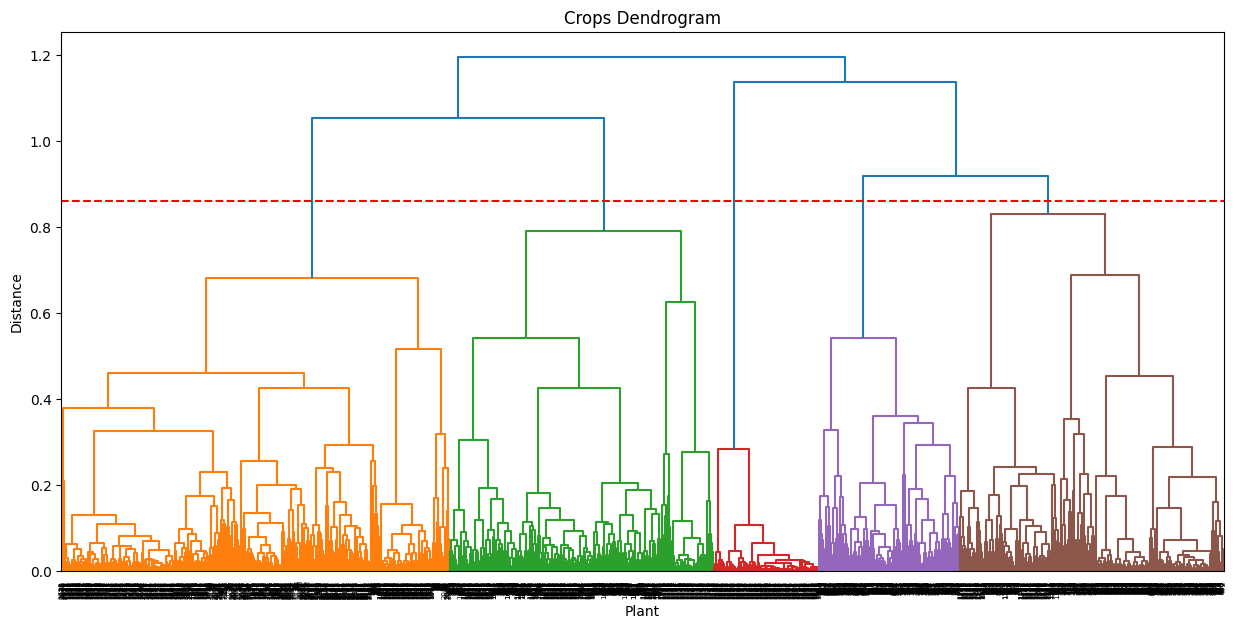

In [31]:
plt.figure(figsize=(15, 7))
plt.title("Crops Dendrogram")

clusters = shc.linkage(x,
            method='average',
            metric="cosine")
shc.dendrogram(Z=clusters)
# Tambahkan garis perpotongan pada dendrogram
cutoff = 0.86  # Sesuaikan nilai cutoff sesuai kebutuhan
plt.axhline(y=cutoff, color='r', linestyle='--')

plt.xlabel("Plant")
plt.ylabel("Distance")
plt.show()

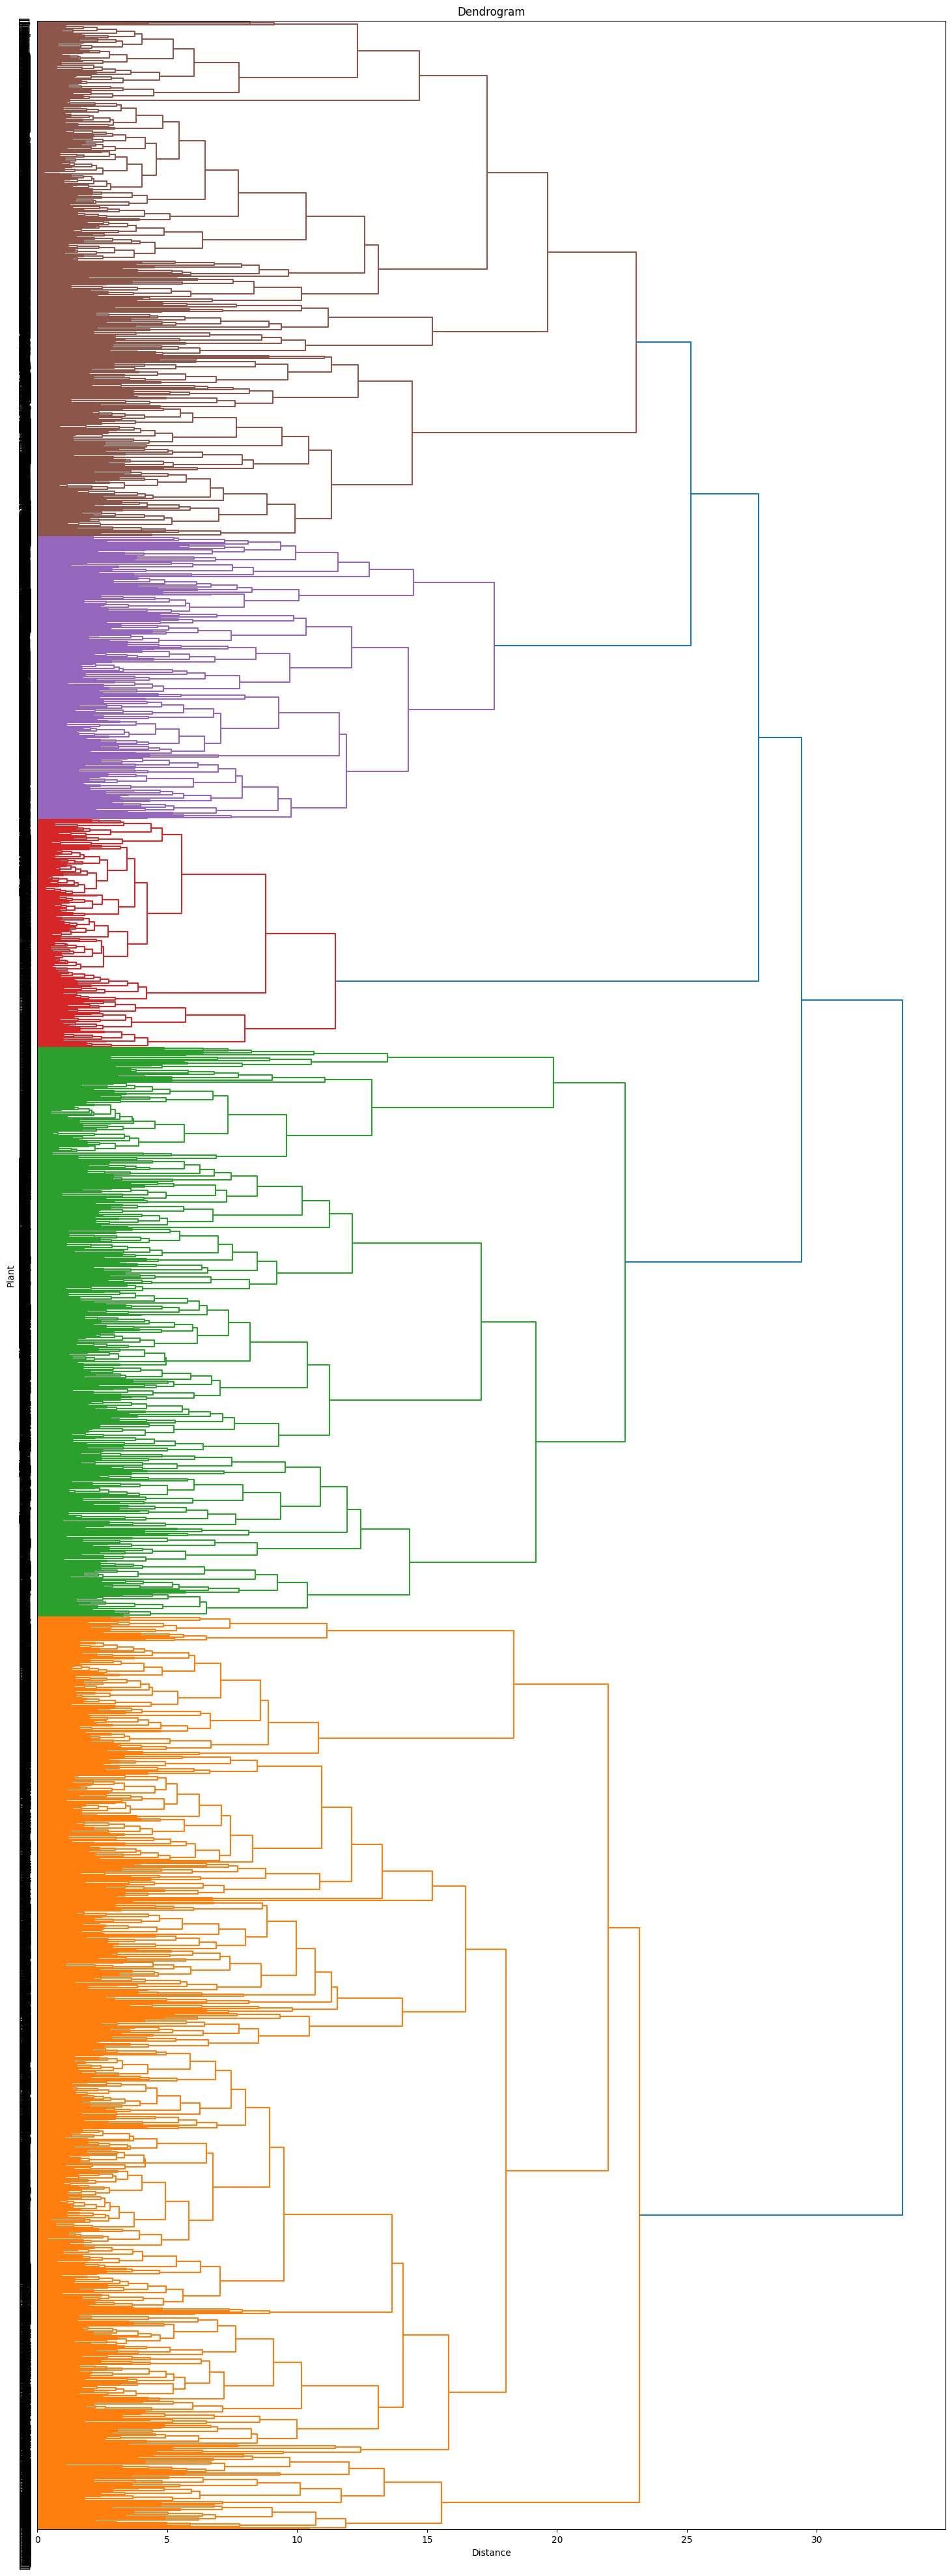

In [32]:
# Membuat figur
fig = plt.figure(figsize=(18, 50))

# Fungsi untuk format label
def llf(id):
    return '[%s]' % df['label_dec'].iloc[id]

# Plot dendrogram
dendo = hierarchy.dendrogram(z_distMatrix, leaf_label_func=llf, leaf_rotation=90, leaf_font_size=12, orientation='right')

plt.title('Dendrogram')
plt.xlabel('Distance')
plt.ylabel('Plant')
plt.show()

Jumlah kluster: 2, Silhouette Score: 0.46889248235224457
Jumlah kluster: 3, Silhouette Score: 0.25363942601692296
Jumlah kluster: 4, Silhouette Score: 0.303073741881892
Jumlah kluster: 5, Silhouette Score: 0.31636346550687405
Jumlah kluster: 6, Silhouette Score: 0.32924077881080926
Jumlah kluster: 7, Silhouette Score: 0.32072998905469985
Jumlah kluster: 8, Silhouette Score: 0.3271503036658078
Jumlah kluster: 9, Silhouette Score: 0.2766339432444172
Jumlah kluster: 10, Silhouette Score: 0.2819154160578481


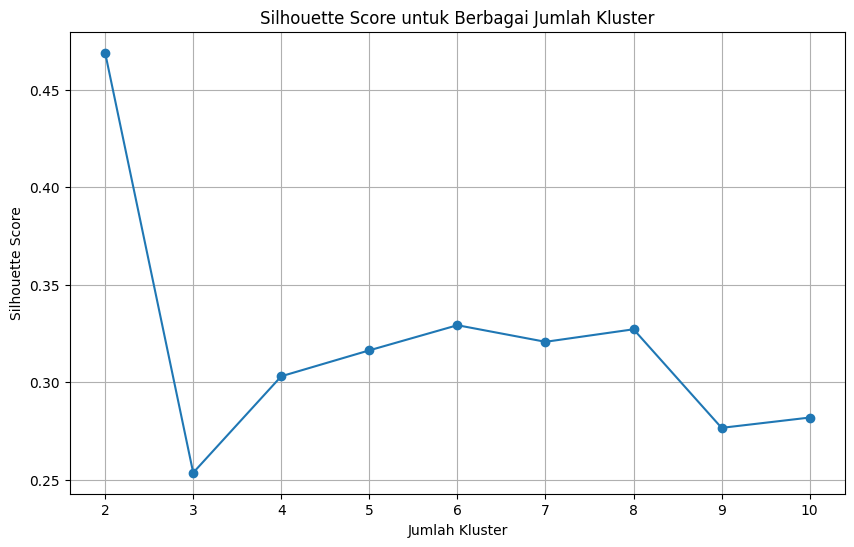

In [33]:
sil_scores = []

cluster_range = range(2, 11)

for n_clusters in cluster_range:
    ahc = AgglomerativeClustering(n_clusters=n_clusters)
    cluster_labels = ahc.fit_predict(x)

    sil_score = silhouette_score(x, cluster_labels)
    sil_scores.append(sil_score)
    print(f'Jumlah kluster: {n_clusters}, Silhouette Score: {sil_score}')

# Plot Silhouette Score untuk berbagai jumlah kluster
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, sil_scores, marker='o')
plt.title('Silhouette Score untuk Berbagai Jumlah Kluster')
plt.xlabel('Jumlah Kluster')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

Jumlah kluster: 2, Davies-Bouldin Score: 0.7187646999246753
Jumlah kluster: 3, Davies-Bouldin Score: 1.3705348723124098
Jumlah kluster: 4, Davies-Bouldin Score: 1.2208613746135089
Jumlah kluster: 5, Davies-Bouldin Score: 1.202951698654358
Jumlah kluster: 6, Davies-Bouldin Score: 1.1697790632952503
Jumlah kluster: 7, Davies-Bouldin Score: 1.1352355168838044
Jumlah kluster: 8, Davies-Bouldin Score: 1.0658371499445924
Jumlah kluster: 9, Davies-Bouldin Score: 1.2243571833920768
Jumlah kluster: 10, Davies-Bouldin Score: 1.1590851563154527


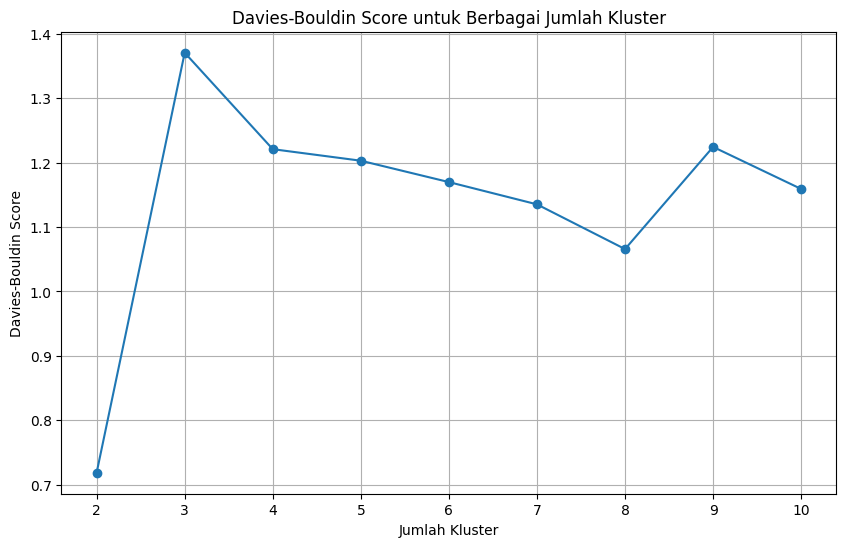

In [34]:
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score

# Misalkan z_distMatrix adalah data Anda
db_scores = []

cluster_range = range(2, 11)

for n_clusters in cluster_range:
    ahc = AgglomerativeClustering(n_clusters=n_clusters)
    cluster_labels = ahc.fit_predict(x)

    db_score = davies_bouldin_score(x, cluster_labels)
    db_scores.append(db_score)
    print(f'Jumlah kluster: {n_clusters}, Davies-Bouldin Score: {db_score}')

# Plot Davies-Bouldin Score untuk berbagai jumlah kluster
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, db_scores, marker='o')
plt.title('Davies-Bouldin Score untuk Berbagai Jumlah Kluster')
plt.xlabel('Jumlah Kluster')
plt.ylabel('Davies-Bouldin Score')
plt.grid(True)
plt.show()

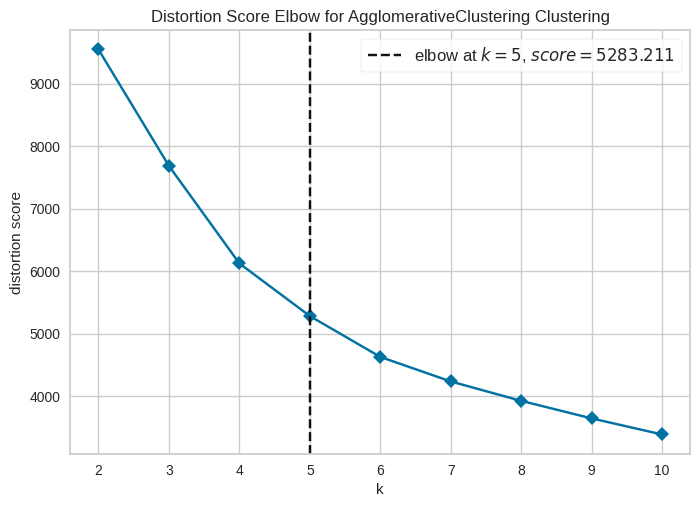

<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [35]:
# Import ElbowVisualizer
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer
model = AgglomerativeClustering()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,11), timings=False)
# Fit data to visualizer
visualizer.fit(x)
# Finalize and render figure
visualizer.show()

In [36]:
model = AgglomerativeClustering(n_clusters = 5, linkage = 'average', metric='cosine')
model.fit_predict(x)

model.labels_

array([3, 3, 3, ..., 3, 3, 3])

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label_en     2200 non-null   int64  
 8   label_dec    2200 non-null   object 
dtypes: float64(4), int64(4), object(1)
memory usage: 154.8+ KB


In [38]:
df['cluster_'] = model.labels_

In [39]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label_en,label_dec,cluster_
0,90,42,43,20.879744,82.002744,6.502985,202.935536,17,padi,3
1,85,58,41,21.770462,80.319644,7.038096,226.655537,17,padi,3
2,60,55,44,23.004459,82.320763,7.840207,263.964248,17,padi,3
3,74,35,40,26.491096,80.158363,6.980401,242.864034,17,padi,3
4,78,42,42,20.130175,81.604873,7.628473,262.717340,17,padi,3


In [40]:
df.groupby(['cluster_','label_dec'])['cluster_'].count()

cluster_  label_dec   
0         jagung           66
          kacang arab     100
          kacang gude      45
          kacang kapri     71
          kacang merah    100
          lentil           17
          mangga          100
1         delima          100
          jeruk           100
          kacang hijau    100
          kelapa          100
          pepaya           99
2         anggur          100
          apel            100
3         jagung           34
          kapas           100
          kopi            100
          melon           100
          padi            100
          pepaya            1
          pisang          100
          rami            100
          semangka        100
4         kacang gude      55
          kacang hitam    100
          kacang kapri     29
          lentil           83
Name: cluster_, dtype: int64

In [41]:
agg_crop = df.groupby(['cluster_','label_dec'])[['N','P','K','temperature', 'humidity', 'ph']].mean()
agg_crop

N           P           K  temperature  \
cluster_ label_dec                                                       
0        jagung         75.196970   49.272727   19.818182    21.119767   
         kacang arab    40.090000   67.790000   79.920000    18.872847   
         kacang gude    21.066667   47.844444   20.000000    28.063720   
         kacang kapri   21.760563   67.253521   20.366197    26.587919   
         kacang merah   20.750000   67.540000   20.050000    20.115085   
         lentil         26.882353   71.352941   18.058824    22.215812   
         mangga         20.070000   27.180000   29.920000    31.208770   
1        delima         18.870000   18.750000   40.210000    21.837842   
         jeruk          19.580000   16.550000   10.010000    22.765725   
         kacang hijau   20.990000   47.280000   19.870000    28.525775   
         kelapa         21.980000   16.930000   30.590000    27.409892   
         pepaya         49.696970   59.121212   50.050505    33.817780   
2        anggur         23.180000  132.530000  200.110000    23.849575   
         apel           20.800000  134.220000  199.890000    22.630942   
3        jagung         82.735294   46.823529   19.735294    24.853405   
         kapas         117.770000   46.240000   19.560000    23.988958   
         kopi          101.200000   28.740000   29.940000    25.540477   
         melon         100.320000   17.720000   50.080000    28.663066   
         padi           79.890000   47.580000   39.870000    23.689332   
         pepaya         68.000000   52.000000   49.000000    24.425613   
         pisang        100.230000   82.010000   50.050000    27.376798   
         rami           78.400000   46.860000   39.990000    24.958376   
         semangka       99.420000   17.000000   50.220000    25.591767   
4        kacang gude    21.745455   48.145455   20.418182    28.302266   
         kacang hitam   40.020000   67.470000   19.240000    29.973340   
         kacang kapri   18.206897   68.896552   20.103448    30.566689   
         lentil         17.108434   67.746988   19.686747    24.978752   

                        humidity        ph  
cluster_ label_dec                          
0        jagung        63.642429  6.144590  
         kacang arab   16.860439  7.336957  
         kacang gude   52.361678  5.033452  
         kacang kapri  47.545895  5.402174  
         kacang merah  21.605357  5.749411  
         lentil        63.748855  6.176466  
         mangga        50.156573  5.766373  
1        delima        90.125504  6.429172  
         jeruk         92.170209  7.016957  
         kacang hijau  85.499975  6.723957  
         kelapa        94.844272  5.976562  
         pepaya        92.404659  6.743101  
2        anggur        81.875228  6.025937  
         apel          92.333383  5.929663  
3        jagung        67.906607  6.440472  
         kapas         79.843474  6.912675  
         kopi          58.869846  6.790308  
         melon         92.342802  6.358805  
         padi          82.272822  6.425471  
         pepaya        92.277491  6.577192  
         pisang        80.358123  5.983893  
         rami          79.639864  6.732778  
         semangka      85.160375  6.495778  
4        kacang gude   53.813932  8.302038  
         kacang hitam  65.118426  7.133952  
         kacang kapri  49.324302  6.753902  
         lentil        65.021059  7.081846

In [42]:
agg_crop.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 27 entries, (0, 'jagung') to (4, 'lentil')
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            27 non-null     float64
 1   P            27 non-null     float64
 2   K            27 non-null     float64
 3   temperature  27 non-null     float64
 4   humidity     27 non-null     float64
 5   ph           27 non-null     float64
dtypes: float64(6)
memory usage: 1.6+ KB


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label_en     2200 non-null   int64  
 8   label_dec    2200 non-null   object 
 9   cluster_     2200 non-null   int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 172.0+ KB


In [44]:
# plt.figure(figsize=(16,10))
# for color, label in zip(colors, cluster_lables):
#     subset = agg_crop.loc[(label,),]
#     for i in subset.index:
#         plt.text(subset.loc[i][0]+5, subset.loc[i][2], 'type='+str(int(i)) + ', price='+str(int(subset.loc[i][3]))+'k')
#     plt.scatter(subset.horsepow, subset.kml, s=subset.price*20, c=color, label='cluster'+str(label))
# plt.legend()
# plt.title('Clusters')
# plt.xlabel('horsepow')
# plt.ylabel('kml')

In [45]:
agg_crop.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 27 entries, (0, 'jagung') to (4, 'lentil')
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            27 non-null     float64
 1   P            27 non-null     float64
 2   K            27 non-null     float64
 3   temperature  27 non-null     float64
 4   humidity     27 non-null     float64
 5   ph           27 non-null     float64
dtypes: float64(6)
memory usage: 1.6+ KB


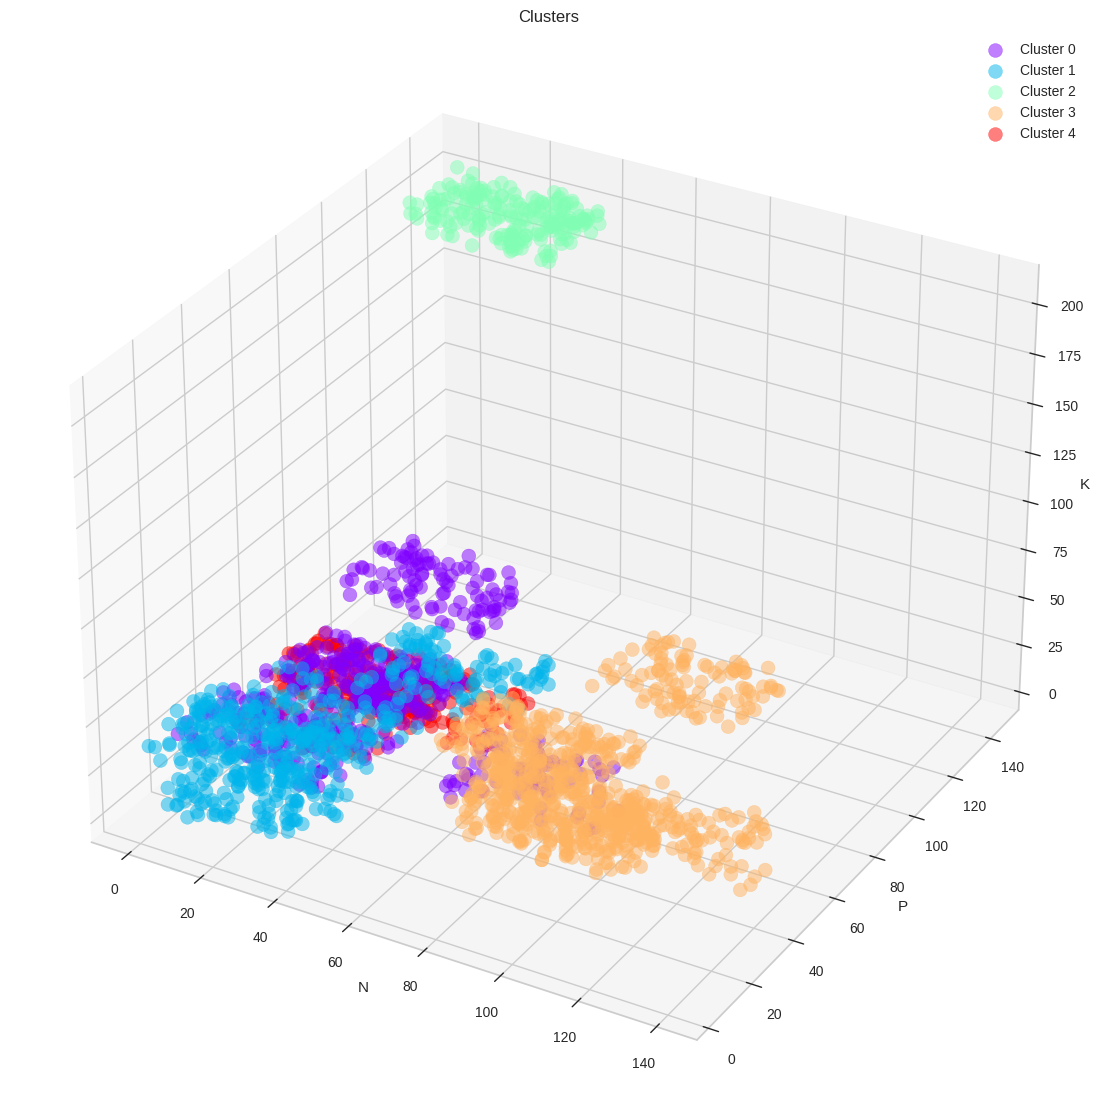

In [46]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Tentukan jumlah cluster dan warna untuk setiap cluster
n_clusters = max(df['cluster_']) + 1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Membuat plot 3D
fig = plt.figure(figsize=(16, 14))
ax = fig.add_subplot(111, projection='3d')

for color, label in zip(colors, cluster_labels):
    subset = df[df['cluster_'] == label]
    ax.scatter(subset['N'], subset['P'], subset['K'], s=100, c=[color], label='Cluster ' + str(label), alpha=0.5)

ax.set_title('Clusters')
ax.set_xlabel('N')
ax.set_ylabel('P')
ax.set_zlabel('K')
ax.legend()

plt.show()

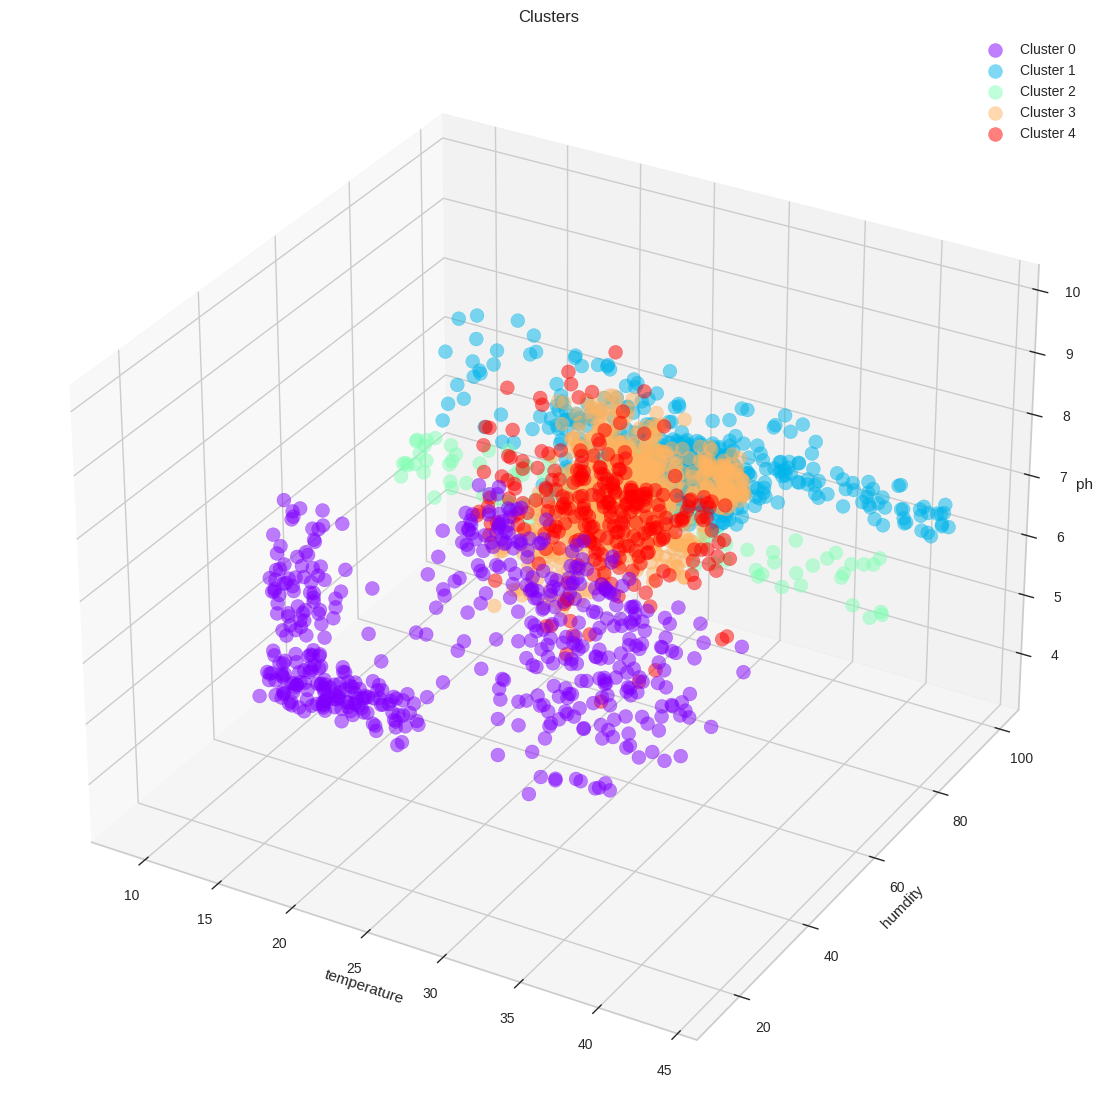

In [47]:
# Tentukan jumlah cluster dan warna untuk setiap cluster
n_clusters = max(df['cluster_']) + 1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Membuat plot 3D
fig = plt.figure(figsize=(16, 14))
ax = fig.add_subplot(111, projection='3d')

for color, label in zip(colors, cluster_labels):
    subset = df[df['cluster_'] == label]
    ax.scatter(subset['temperature'], subset['humidity'], subset['ph'], s=100, c=[color], label='Cluster ' + str(label), alpha=0.5)

ax.set_title('Clusters')
ax.set_xlabel('temperature')
ax.set_ylabel('humdity')
ax.set_zlabel('ph')
ax.legend()

plt.show()

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label_en     2200 non-null   int64  
 8   label_dec    2200 non-null   object 
 9   cluster_     2200 non-null   int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 172.0+ KB


In [49]:
model.labels_

array([3, 3, 3, ..., 3, 3, 3])

# **Sistem Rekomendasi**

In [50]:
from sklearn.metrics.pairwise import cosine_similarity

# Fungsi untuk prediksi tanaman berdasarkan input kondisi menggunakan cosine similarity
def predict_plant_cosine(input_features, model, x, df, scaler):
    # Scale input features
    input_scaled = scaler.transform([input_features])

    # Hitung kesamaan cosine antara input dan semua titik dalam dataset yang sudah diskalakan
    cosine_sim = cosine_similarity(input_scaled, x)

    # Temukan index dari data dengan cosine similarity tertinggi
    most_similar_index = np.argmax(cosine_sim)

    # Ambil nama tanaman dari data dengan kesamaan tertinggi
    suggested_crop = df.iloc[most_similar_index]['label_dec']

    return suggested_crop

In [54]:
# Fungsi untuk mengambil input dari keyboard dan mengubahnya ke float
def get_input_from_user():
    # Minta pengguna untuk memasukkan nilai untuk setiap parameter
    nitrogen = float(input("Masukkan nilai Nitrogen (misal: 30): "))
    phosphorus = float(input("Masukkan nilai Phosphorus (misal: 80): "))
    potassium = float(input("Masukkan nilai Potassium (misal: 70): "))
    temperature = float(input("Masukkan nilai Suhu (°C) (misal: 26): "))
    humidity = float(input("Masukkan nilai Kelembaban (%) (misal: 50): "))
    pH = float(input("Masukkan nilai pH (misal: 5.5): "))

    # Mengembalikan input pengguna dalam bentuk list
    return [nitrogen, phosphorus, potassium, temperature, humidity, pH]


# Mulai waktu
start_time = time.time()

# Meminta input dari pengguna
input_conditions = get_input_from_user()

# Prediksi tanaman yang direkomendasikan
suggested_crop = predict_plant_cosine(input_conditions, model, x, df, scaler)
print("Tanaman yang Direkomendasikan adalah:", suggested_crop)

# Waktu selesai1
end_time = time.time()

# Hitung waktu komputasi
computation_time = end_time - start_time

print(f"Waktu komputasi: {computation_time} detik")


Masukkan nilai Nitrogen (misal: 30): 7
Masukkan nilai Phosphorus (misal: 80): 47
Masukkan nilai Potassium (misal: 70): 25
Masukkan nilai Suhu (°C) (misal: 26): 30
Masukkan nilai Kelembaban (%) (misal: 50): 83
Masukkan nilai pH (misal: 5.5): 6.4
Tanaman yang Direkomendasikan adalah: kacang hijau
Waktu komputasi: 18.83888006210327 detik


In [ ]:
# import time

# # Mulai waktu
# start_time = time.time()

# # Contoh inputan prediksi
# input_conditions = [400, 23, 21, 22, 100, 6]

# # Prediksi tanaman yang direkomendasikan
# suggested_crop = predict_plant_cosine(input_conditions, model, x, df, scaler)
# print("Tanaman yang Direkomendasikan adalah:", suggested_crop)

# # Waktu selesai
# end_time = time.time()

# # Hitung waktu komputasi
# computation_time = end_time - start_time

# print(f"Waktu komputasi: {computation_time} detik")

In [ ]:
# print(df['cluster_'].value_counts())
# print(df.groupby('cluster_')['label_dec'].unique())

#**Deploy Model**

In [ ]:
# import pickle

In [ ]:
# pickle.dump(df.to_dict(),open('recommendation_dict.pkl','wb'))

In [ ]:
# # Simpan model clustering
# pickle.dump(model, open('clustering_model.pkl', 'wb'))

# # Simpan labels hasil clustering jika diperlukan
# pickle.dump(model.labels_, open('cluster_labels.pkl', 'wb'))

In [ ]:
# pickle.dump(scaler, open('scaler.pkl', 'wb'))

In [ ]:
# pickle.dump(x, open('x.pkl', 'wb'))

In [ ]:
# import pandas as pd

# # Menghitung jumlah elemen di setiap cluster
# cluster_counts = pd.Series(labels).value_counts()

# # Menampilkan distribusi cluster
# print("Distribusi Cluster:")
# print(cluster_counts)